<a href="https://www.kaggle.com/code/averma111/pytorch-ps-s3e14?scriptVersionId=128236931" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Global Setting

In [2]:
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

###  Assigning the directory and file paths

In [3]:
ROOT_PATH='/kaggle/input/playground-series-s3e14'
train_file = 'train.csv'
test_file = 'test.csv'
sample = 'sample_submission.csv'

### Reading the train data

In [4]:
train = pd.read_csv(ROOT_PATH+'/'+train_file)
train.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

### Defining the summary function

In [5]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['inf'] = np.isinf(df).sum().sum()
    summ['duplicate'] = df.duplicated().sum()
    return summ

###  Summary of the trained data

In [6]:
summary('train',train)

train shape: (15289, 18)


dtypes  null  unique          min       median  \
id                      int64     0   15289     0.000000  7644.000000   
clonesize             float64     0       6    10.000000    25.000000   
honeybee              float64     0       7     0.000000     0.500000   
bumbles               float64     0      11     0.000000     0.250000   
andrena               float64     0      16     0.000000     0.500000   
osmia                 float64     0      14     0.000000     0.630000   
MaxOfUpperTRange      float64     0       6    69.700000    86.000000   
MinOfUpperTRange      float64     0       5    39.000000    52.000000   
AverageOfUpperTRange  float64     0       5    58.200000    71.900000   
MaxOfLowerTRange      float64     0       6    50.200000    62.000000   
MinOfLowerTRange      float64     0       7    24.300000    30.000000   
AverageOfLowerTRange  float64     0       5    41.200000    50.800000   
RainingDays           float64     0       6     1.000000    16.000000   
AverageRainingDays    float64     0       8     0.060000     0.260000   
fruitset              float64     0    1526     0.192732     0.506600   
fruitmass             float64     0    1515     0.311921     0.446570   
seeds                 float64     0    2066    22.079199    36.040675   
yield                 float64     0     776  1945.530610  6117.475900   

                               max         mean          std  inf  duplicate  
id                    15288.000000  7644.000000  4413.698468    0          0  
clonesize                40.000000    19.704690     6.595211    0          0  
honeybee                 18.430000     0.389314     0.361643    0          0  
bumbles                   0.585000     0.286768     0.059917    0          0  
andrena                   0.750000     0.492675     0.148115    0          0  
osmia                     0.750000     0.592355     0.139489    0          0  
MaxOfUpperTRange         94.600000    82.169887     9.146703    0          0  
MinOfUpperTRange         57.200000    49.673281     5.546405    0          0  
AverageOfUpperTRange     79.000000    68.656256     7.641807    0          0  
MaxOfLowerTRange         68.200000    59.229538     6.610640    0          0  
MinOfLowerTRange         33.000000    28.660553     3.195367    0          0  
AverageOfLowerTRange     55.900000    48.568500     5.390545    0          0  
RainingDays              34.000000    18.660865    11.657582    0          0  
AverageRainingDays        0.560000     0.324176     0.163905    0          0  
fruitset                  0.652144     0.502741     0.074390    0          0  
fruitmass                 0.535660     0.446553     0.037035    0          0  
seeds                    46.585105    36.164950     4.031087    0          0  
yield                  8969.401840  6025.193999  1337.056850    0          0


* No null values. We therefore dont need to use imputation
* Categorical data ==> No Categorical data
* Data types are all float values excluding the target (integer)
* Data is reasonably small with only 15289 datapoints
* Duplicates: No duplicate

### Distribution of the target label 

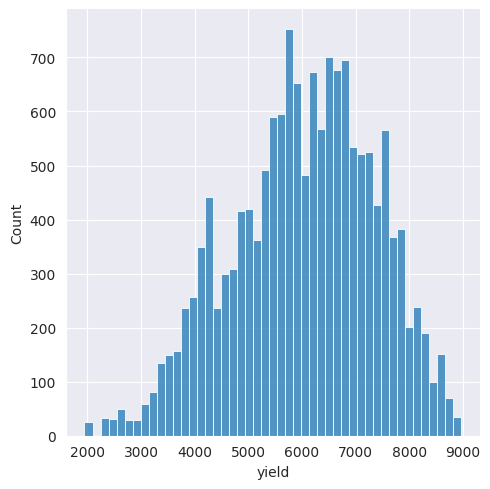

In [7]:
sns.displot(train['yield'])
## Distribution looks fairely normal

## Pairplot of the train dataset

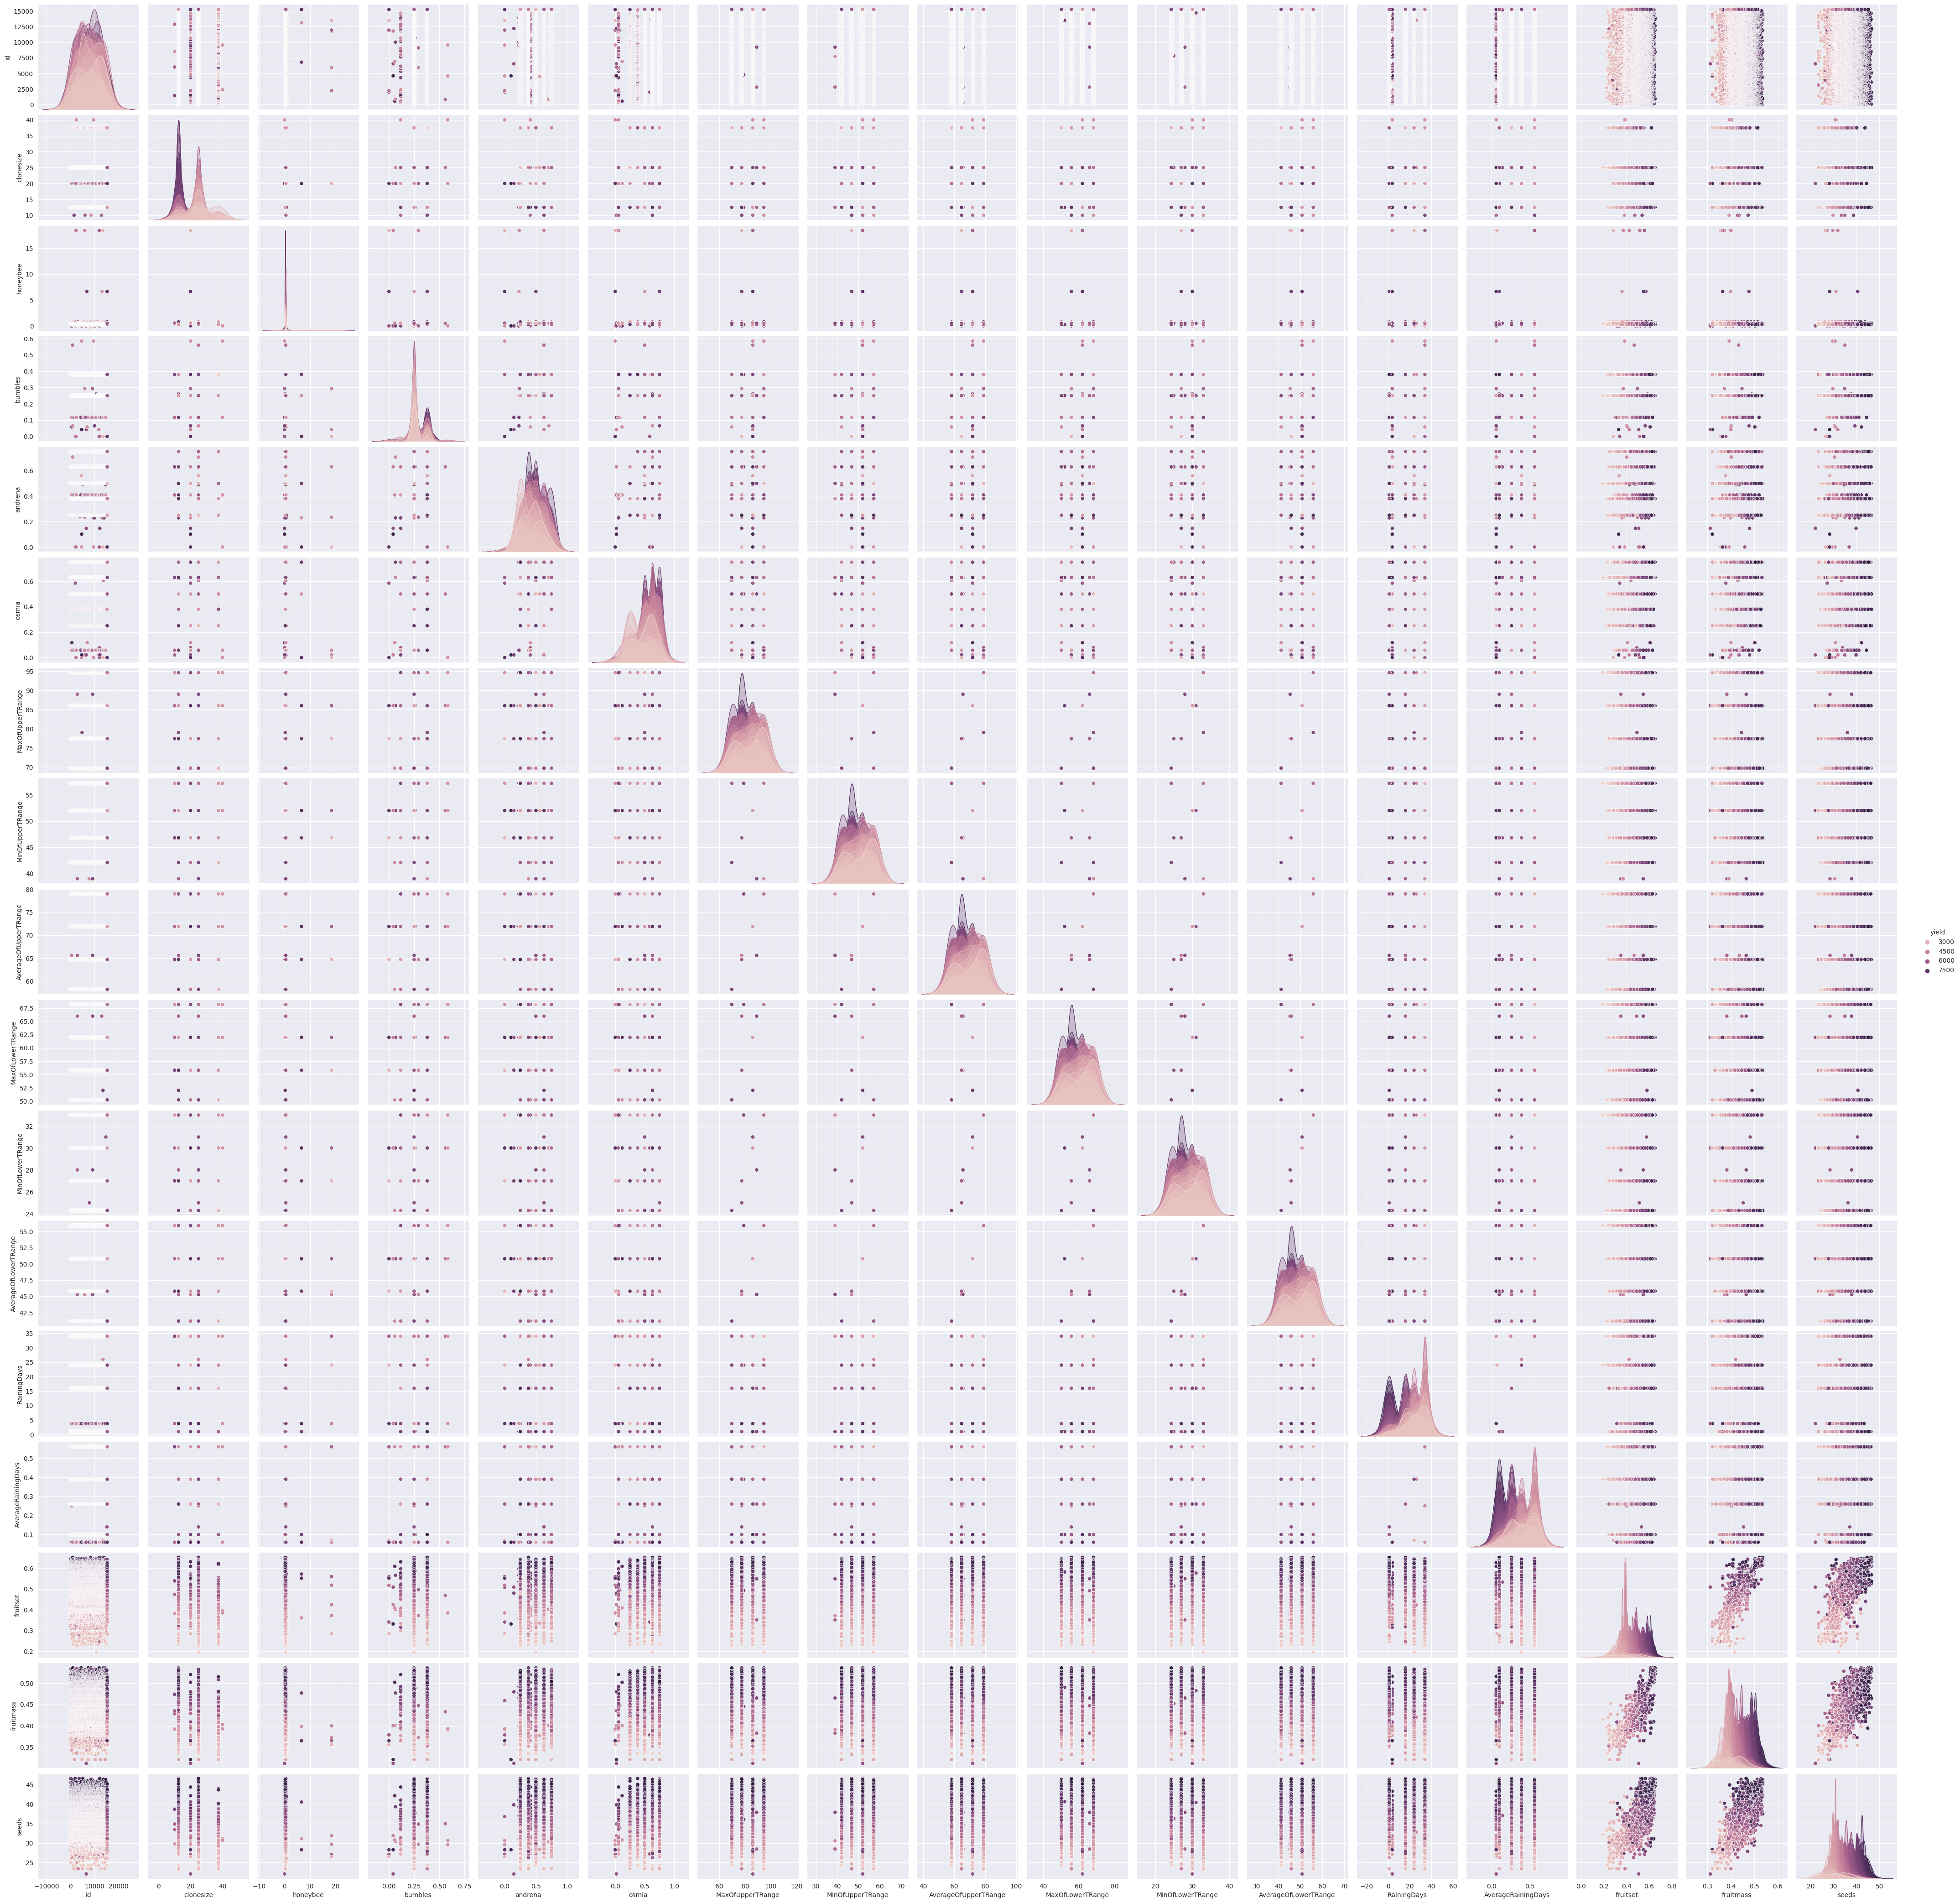

In [8]:
sns.pairplot(data=train,hue='yield')